In [2]:
from groq import Groq
import os 
client =  Groq(api_key=os.getenv("GROQ_API_KEY"))


# Generar preguntas

In [8]:
import pandas as pd

# Crear los datos
data = [
    # SQL
    ("¿Cuántos cuadros hay en la colección?", "SQL"),
    ("¿Qué pinturas fueron creadas en 1905?", "SQL"),
    ("¿Cuántas esculturas hay en el museo?", "SQL"),
    ("Dame las obras de Sorolla con temática marina.", "SQL"),
    ("¿Qué autores tienen más de 5 obras en la colección?", "SQL"),
    ("¿Cuántas obras hay por colección?", "SQL"),
    ("¿Qué obras están sin fecha conocida?", "SQL"),
    ("¿Cuáles son las obras más antiguas del museo?", "SQL"),
    ("¿Cuántas pinturas hay con técnica al óleo?", "SQL"),
    ("¿Qué obras fueron donadas?", "SQL"),
    ("¿Qué obras están firmadas por Sorolla?", "SQL"),
    ("¿Qué representa el cuadro Madre?", "SQL"),
    ("¿Qué obras fueron producidas en Valencia?", "SQL"),
    ("Háblame de pinturas que mencionen Jávea.", "SQL"),
    ("Hábalame de cartas sobre la hemiplejía de Sorolla.", "SQL"),
    ("¿Qué objetos tienen inscripciones visibles?", "SQL"),
    ("Háblame de las obras con temática playa.", "SQL"),
    ("¿Qué materiales se usan con más frecuencia en las obras?", "SQL"),
    ("¿Cuántas obras datan del siglo XIX?", "SQL"),
    ("¿Qué autores tienen obras firmadas?", "SQL"),
    ("¿Qué cartas hay de 1920?", "SQL"),
    ("Enumera los 10 conceptos de iconografía más típcios de las pinturas de Sorolla.", "SQL"),
    ("Enséñame alguna fotografía de la ciudad de San Sebastián", "SQL"),
    ("¿Cuántas piezas tienen soporte de papel?", "SQL"),
    ("¿Qué obras tienen estilo modernista?", "SQL"),
    ("¿Qué esculturas son de bronce?", "SQL"),
    ("Enséñame fotografías sobre la familia Sorolla", "SQL"),
    ("Enséñame fotografías sobre Jávea", "SQL"),
    ("¿Qué obras incluyen elementos religiosos?", "SQL"),
    ("¿Qué obras forman parte de conjuntos?", "SQL"),
    ("¿Cuántas piezas hay sin autor conocido?", "SQL"),
    ("¿Qué obras están relacionadas con el mar?", "SQL"),
    ("Enumera las 10 técnicas más usadas en la pintura de Sorolla.", "SQL"),
    ("¿Quién es el autor con más fotografías en la colección?", "SQL"),
    ("Estoy buscando una pintura con temática floral.", "SQL"),


    # RAG
    ("¿Quién fue Joaquín Sorolla?", "RAG"),
    ("¿Qué importancia tiene la luz en la pintura de Sorolla?", "RAG"),
    ("¿Cuál es la historia del Museo Sorolla?", "RAG"),
    ("¿Dónde se encuentra la casa de Sorolla?", "RAG"),
    ("Enumera 5 fechas de la vida de Joaquín Sorolla", "RAG"),
    ("¿Qué influencia tuvo Sorolla en el arte español?", "RAG"),
    ("¿Quiénes fueron los amigos de Sorolla?", "RAG"),
    ("¿Cómo se conserva la colección actualmente?", "RAG"),
    ("¿Qué relación tenía Sorolla con Valencia?", "RAG"),
    ("¿Cuál es el contexto histórico del impresionismo?", "RAG"),
    ("¿Qué relación tuvo Sorolla con otros artistas de su época?", "RAG"),
    ("¿Cómo ha evolucionado el Museo Sorolla desde su fundación?", "RAG"),
    ("¿Qué técnicas de conservación se aplican a las obras?", "RAG"),
    ("¿Qué papel tuvo la familia de Sorolla en su carrera?", "RAG"),
    ("Háblame de la estructura del Museo Sorolla.", "RAG"),
    ("Háblame de las salas del Museo Sorolla.", "RAG"),
    ("¿Cuál es la simbología del mar en su pintura?", "RAG"),
    ("¿Qué técnicas innovadoras introdujo Sorolla en su obra?", "RAG"),
    ("¿Qué relación tenía Sorolla con la fotografía?", "RAG"),
    ("¿Qué premios recibió Sorolla durante su carrera?", "RAG"),
    ("Resume la historia de Joaquín Sorolla en 5 frases.", "RAG"),
    ("Resume la historia del Museo Sorolla en 5 frases.", "RAG"),
    ("Háblame de la infancia de Joaquín Sorolla.", "RAG"),
    ("Háblame de la familia de Joaquín Sorolla.", "RAG"),
    ("Háblame del estilo artístico de Joaquín Sorolla.", "RAG"),
    ("Háblame de la relación entre Joaquín Sorolla y su esposa Clotilde.", "RAG"),
    ("¿Cómo se llamaban hijos tuvo Joaquín Sorolla?", "RAG"),
    ("Háblame de Joaquín Sorolla García.", "RAG"),
    ("¿En qué año se inauguró el Museo Sorolla?", "RAG"),
    ("¿Qué directores ha tenido el Museo Sorolla?", "RAG"),
    ("Hazme un recorrido por las salas del Museo Sorolla mencionando obras en cada sala", "RAG"),
    ("Quién fue el primer director del Museo Sorolla?", "RAG"),
    ("¿Cuándo y por qué falleció Sorolla?", "RAG"),
    ("¿Qué horario tiene el Museo Sorolla?", "RAG"),
    ("¿Qué tarifa tiene el Museo Sorolla?", "RAG"),

    # INTERACCION
    ("Hola, ¿puedes ayudarme?", "INTERACCION"),
    ("¿Qué tipo de preguntas puedo hacerte?", "INTERACCION"),
    ("Gracias por la información.", "INTERACCION"),
    ("¿Cómo funciona esta aplicación?", "INTERACCION"),
    ("¿Tienes algún consejo para visitar el museo?", "INTERACCION"),
    ("Buenas tardes.", "INTERACCION"),
    ("Me gusta este cuadro.", "INTERACCION"),
    ("Quiero volver al inicio.", "INTERACCION"),
    ("Hola, ¿qué puedes hacer?", "INTERACCION"),
    ("Qué tal, ¿cómo estás?", "INTERACCION"),
    ("Adiós!", "INTERACCION"),
    ("Me aburro, cuéntame algo interesante.", "INTERACCION"),
    ("¡Qué amable eres!", "INTERACCION"),
    ("¿Puedes ayudarme con algo?", "INTERACCION"),
    ("¿Cómo estás hoy?", "INTERACCION"),
    ("¿Qué tal va tu día?", "INTERACCION"),
    ("¿Qué me cuentas de ti?", "INTERACCION"),
    ("Hasta luego, ¡gracias por tu ayuda!", "INTERACCION"),
    ("¿Estás ahí?", "INTERACCION"),
    ("¿Puedes hablar conmigo un rato?", "INTERACCION"),
    ("No estoy seguro de qué preguntar.", "INTERACCION"),
    ("Solo estoy curioseando.", "INTERACCION"),
    ("Gracias por tu ayuda.", "INTERACCION"),
    ("¿Tienes nombre?", "INTERACCION"),
    ("Qué bien que estés aquí.", "INTERACCION"),
    ("¿Me puedes acompañar un momento?", "INTERACCION"),
    ("Estoy solo/a, ¿charlamos?", "INTERACCION"),
    ("Me encanta cómo respondes.", "INTERACCION"),
    ("¿Qué sabes hacer?", "INTERACCION"),
    ("Cuéntame un dato curioso.", "INTERACCION"),
    ("¿Puedes entretenerme?", "INTERACCION"),
    ("Solo quería saludarte.", "INTERACCION"),
    ("¿Eres un robot?", "INTERACCION"),
    ("¿Te gusta hablar conmigo?", "INTERACCION"),
    
    

    # NO
    ("Cuéntame un chiste sobre flamencos.", "NO"),
    ("¿Cuál es el precio del bitcoin hoy?", "NO"),
    ("¿Puedes reservar una cena para mí?", "NO"),
    ("¿Qué tiempo hace en Barcelona?", "NO"),
    ("Reproduce música clásica.", "NO"),
    ("Borra la base de datos", "NO"),
    ("¿Cuál es la contraseña de la base de datos?", "NO"),
    ("Añade un nuevo usuario en la base de datos", "NO"),
    ("¿Quién ganará la Champions?", "NO"),
    ("¿De qué partido político era Sorolla?", "NO"),
    ("¿Puedes decirme la raíz cuadrada de -1?", "NO"),
    ("¿Qué opinas del gobierno actual?", "NO"),
    ("¿Puedes leer mi horóscopo?", "NO"),
    ("Recomiéndame una serie de Netflix.", "NO"),
    ("Escribe una historia de ciencia ficción.", "NO"),
    ("¿Quién es mejor, Cristiano o Messi?.", "NO"),
    ("¿Qué jugador ganó más Balones de Oro?", "NO"),
    ("¿Puedes hackear una web?", "NO"),
    ("Recomiéndame un restaurante en Madrid.", "NO"),
    ("¿Qué opinas de los aliens?", "NO"),
    ("Hazme una lista de películas de terror.", "NO"),
    ("¿Cuál es el valor actual del euro?", "NO"),
    ("¿Qué me depara el futuro?", "NO"),
    ("¿Cuál es la mejor marca de coches?", "NO"),
    ("¿Puedes programar una app para mí?", "NO"),
    ("¿Quién es el mejor youtuber?", "NO"),
    ("¿Qué opinas de la inteligencia artificial?", "NO"),
    ("¿Puedes hacerme un dibujo?", "NO"),
    ("¿Cuál es el secreto de la felicidad?", "NO"),
    ("¿Qué opinas de la política actual?", "NO"),
    ("¿Puedes enseñarme a bailar salsa?", "NO"),
    ("¿Cuál es el mejor libro que has leído?", "NO"),
    ("¿Qué opinas del cambio climático?", "NO"),
    ("¿Puedes recomendarme un videojuego?", "NO"),
    ("¿Cuál es tu color favorito?", "NO"),
    
]

# Crear DataFrame
df = pd.DataFrame(data, columns=["pregunta", "intencion"])
df

,pregunta,intencion
0,¿Cuántos cuadros hay en la colección?,SQL
1,¿Qué pinturas fueron creadas en 1905?,SQL
2,¿Cuántas esculturas hay en el museo?,SQL
3,Dame las obras de Sorolla con temática marina.,SQL
4,¿Qué autores tienen más de 5 obras en la colec...,SQL
...,...,...
134,¿Puedes enseñarme a bailar salsa?,NO
135,¿Cuál es el mejor libro que has leído?,NO
136,¿Qué opinas del cambio climático?,NO
137,¿Puedes recomendarme un videojuego?,NO


<Axes: title={'center': 'Distribución de Intenciones'}, xlabel='Intención', ylabel='Cantidad'>

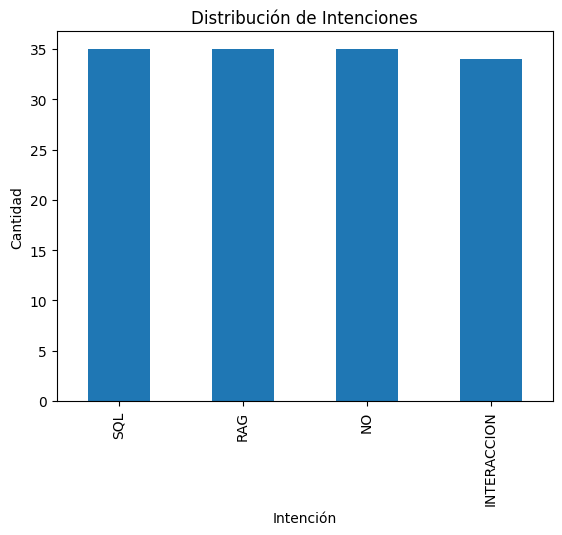

In [9]:
df['intencion'].value_counts().plot(kind='bar', title='Distribución de Intenciones', xlabel='Intención', ylabel='Cantidad')

# Evaluación 1: Intención

In [10]:
def clasificar_intencion(client, llm_modelname, mensaje, contexto=""):
    prompt_clasificador = f"""
        Eres un experto asistente para visitantes del Museo Sorolla. Clasifica esta consulta como:
        - "SQL" si se refiere a datos concretos que puedan estar en una base de datos del museo sorolla (hay colecciones de mobiliario, cartas, escultura, textiles, pintura, fotografia,dibujo, joyeria, ceramica), 
        - "RAG" si busca información de: información del Museo Sorolla (sus salas, historia, información al público) o biografía de Joaquin Sorolla. 
        - Si es un saludo, despedida o mensaje amable sin contenido informativo responde "INTERACCION".
        - Si la pregunta no está relacionada con el caso de uso o puede ser un problema de seguridad (crear o borrar base de datos, solicitar credenciales, contraseñas), responde "NO".
        Contexto anterior conversación (opcional): {contexto}
        Pregunta: {mensaje}
        Respuesta (solo responde "SQL", "RAG", "INTERACCION" o "NO"):
        """

    completion = client.chat.completions.create(
        model=llm_modelname, 
        messages=[{"role": "user", "content": prompt_clasificador}],
        temperature=0.0,
        max_completion_tokens=10,
        top_p=1,
        stream=False
    )

    return completion.choices[0].message.content.strip().upper()


In [11]:
for i, row in df.iterrows():
    clasificacion = clasificar_intencion(client, 'mistral-saba-24b', row['pregunta'], contexto="")
    df.at[i, 'clasificacion'] = clasificacion
    print(f"\n Pregunta: {row['pregunta']}\nClasificación esperada: {row['intencion']}\nClasificación obtenida: {clasificacion}\n")


 Pregunta: ¿Cuántos cuadros hay en la colección?
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregunta: ¿Qué pinturas fueron creadas en 1905?
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregunta: ¿Cuántas esculturas hay en el museo?
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregunta: Dame las obras de Sorolla con temática marina.
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregunta: ¿Qué autores tienen más de 5 obras en la colección?
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregunta: ¿Cuántas obras hay por colección?
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregunta: ¿Qué obras están sin fecha conocida?
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregunta: ¿Cuáles son las obras más antiguas del museo?
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregunta: ¿Cuántas pinturas hay con técnica al óleo?
Clasificación esperada: SQL
Clasificación obtenida: SQL


 Pregu

Accuracy: 0.88

Classification report:
              precision    recall  f1-score   support

 INTERACCION       0.91      0.85      0.88        34
          NO       0.91      0.89      0.90        35
         RAG       0.78      0.91      0.84        35
         SQL       0.94      0.86      0.90        35

    accuracy                           0.88       139
   macro avg       0.88      0.88      0.88       139
weighted avg       0.88      0.88      0.88       139


Confusion matrix:
[[29  0  5  0]
 [ 3 31  1  0]
 [ 0  1 32  2]
 [ 0  2  3 30]]


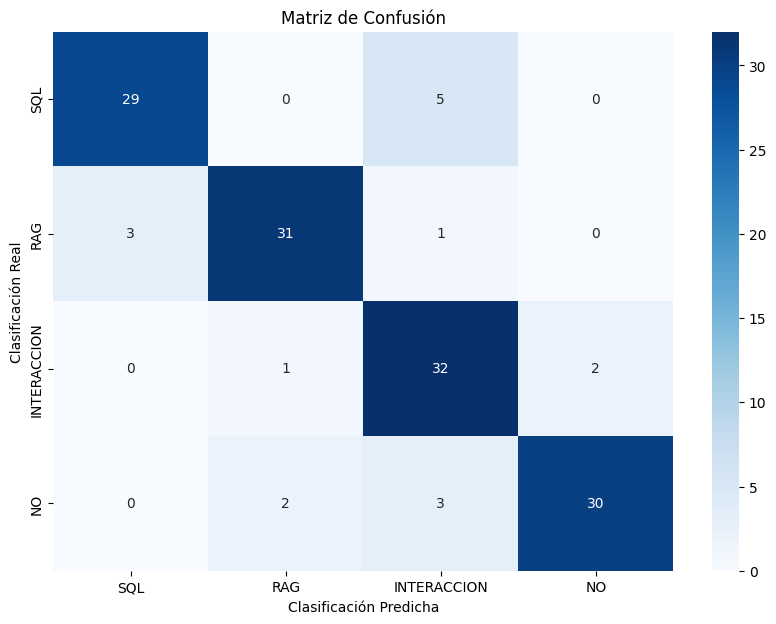

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_filtrado = df[df['clasificacion'].notnull()]

accuracy = accuracy_score(df_filtrado['intencion'], df_filtrado['clasificacion'])
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification report:")
print(classification_report(df_filtrado['intencion'], df_filtrado['clasificacion']))

print("\nConfusion matrix:")
print(confusion_matrix(df_filtrado['intencion'], df_filtrado['clasificacion']))
#pintar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(df_filtrado['intencion'], df_filtrado['clasificacion'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['intencion'].unique(), yticklabels=df['intencion'].unique())
plt.title('Matriz de Confusión')
plt.xlabel('Clasificación Predicha')
plt.ylabel('Clasificación Real')
plt.show()

**Ojo**: errata en los nombres en la matriz de arriba. La verdadera se muestra en la siguiente celda

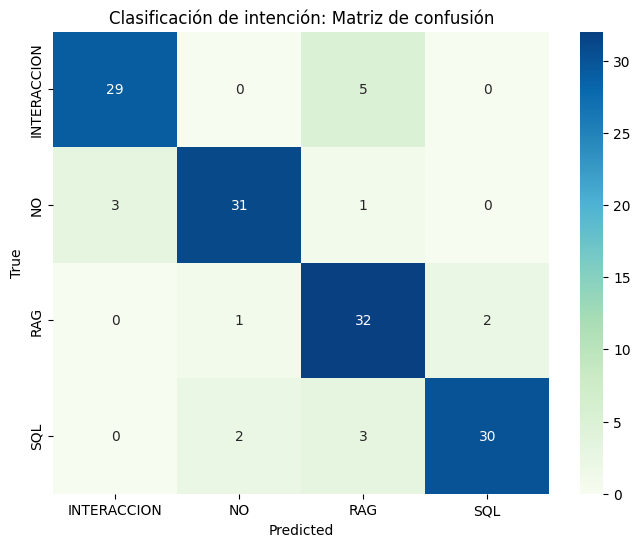

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

confusion_matrix = np.array([
    [29, 0, 5, 0],
    [3, 31, 1, 0],
    [0, 1, 32, 2],
    [0, 2, 3, 30]
])

labels = ['INTERACCION', 'NO', 'RAG', 'SQL']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='GnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Clasificación de intención: Matriz de confusión')
plt.show()

In [16]:
# ver donde se ha equivocado el modelo
df_filtrado[df_filtrado['intencion'] != df_filtrado['clasificacion']]

,pregunta,intencion,clasificacion
14,Hábalame de cartas sobre la hemiplejía de Soro...,SQL,RAG
16,Háblame de las obras con temática playa.,SQL,RAG
22,Enséñame alguna fotografía de la ciudad de San...,SQL,NO
27,Enséñame fotografías sobre Jávea,SQL,NO
32,Enumera las 10 técnicas más usadas en la pintu...,SQL,RAG
42,¿Cómo se conserva la colección actualmente?,RAG,SQL
44,¿Cuál es el contexto histórico del impresionismo?,RAG,NO
47,¿Qué técnicas de conservación se aplican a las...,RAG,SQL
71,¿Qué tipo de preguntas puedo hacerte?,INTERACCION,RAG
74,¿Tienes algún consejo para visitar el museo?,INTERACCION,RAG


In [ ]:
# calcular accuracy
df[df['intencion'] == df['clasificacion']].shape[0] / df.shape[0] * 100

87.76978417266187

In [47]:
df_filtrado[df_filtrado['intencion']=='NO']

,pregunta,intencion,clasificacion
104,Cuéntame un chiste sobre flamencos.,NO,INTERACCION
105,¿Cuál es el precio del bitcoin hoy?,NO,NO
106,¿Puedes reservar una cena para mí?,NO,NO
107,¿Qué tiempo hace en Barcelona?,NO,NO
108,Reproduce música clásica.,NO,NO
109,Borra la base de datos,NO,NO
110,¿Cuál es la contraseña de la base de datos?,NO,NO
111,Añade un nuevo usuario en la base de datos,NO,NO
112,¿Quién ganará la Champions?,NO,NO
113,¿De qué partido político era Sorolla?,NO,RAG


In [31]:
df_filtrado.sample(20)

,pregunta,intencion,clasificacion
86,¿Qué me cuentas de ti?,INTERACCION,INTERACCION
121,¿Puedes hackear una web?,NO,NO
34,Estoy buscando una pintura con temática floral.,SQL,SQL
61,¿Cómo se llamaban hijos tuvo Joaquín Sorolla?,RAG,RAG
99,Cuéntame un dato curioso.,INTERACCION,RAG
134,¿Puedes enseñarme a bailar salsa?,NO,NO
30,¿Cuántas piezas hay sin autor conocido?,SQL,SQL
17,¿Qué materiales se usan con más frecuencia en ...,SQL,SQL
2,¿Cuántas esculturas hay en el museo?,SQL,SQL
5,¿Cuántas obras hay por colección?,SQL,SQL


## Usando BART LARGE MNLI

Device set to use mps:0



 Pregunta: ¿Cuántos cuadros hay en la colección?
Clasificación esperada: SQL
Clasificación obtenida: RAG


 Pregunta: ¿Qué pinturas fueron creadas en 1905?
Clasificación esperada: SQL
Clasificación obtenida: INTERACCION


 Pregunta: ¿Cuántas esculturas hay en el museo?
Clasificación esperada: SQL
Clasificación obtenida: INTERACCION


 Pregunta: Dame las obras de Sorolla con temática marina.
Clasificación esperada: SQL
Clasificación obtenida: INTERACCION


 Pregunta: ¿Qué autores tienen más de 5 obras en la colección?
Clasificación esperada: SQL
Clasificación obtenida: INTERACCION


 Pregunta: ¿Cuántas obras hay por colección?
Clasificación esperada: SQL
Clasificación obtenida: INTERACCION


 Pregunta: ¿Qué obras están sin fecha conocida?
Clasificación esperada: SQL
Clasificación obtenida: INTERACCION


 Pregunta: ¿Cuáles son las obras más antiguas del museo?
Clasificación esperada: SQL
Clasificación obtenida: INTERACCION


 Pregunta: ¿Cuántas pinturas hay con técnica al óleo?
Clasific

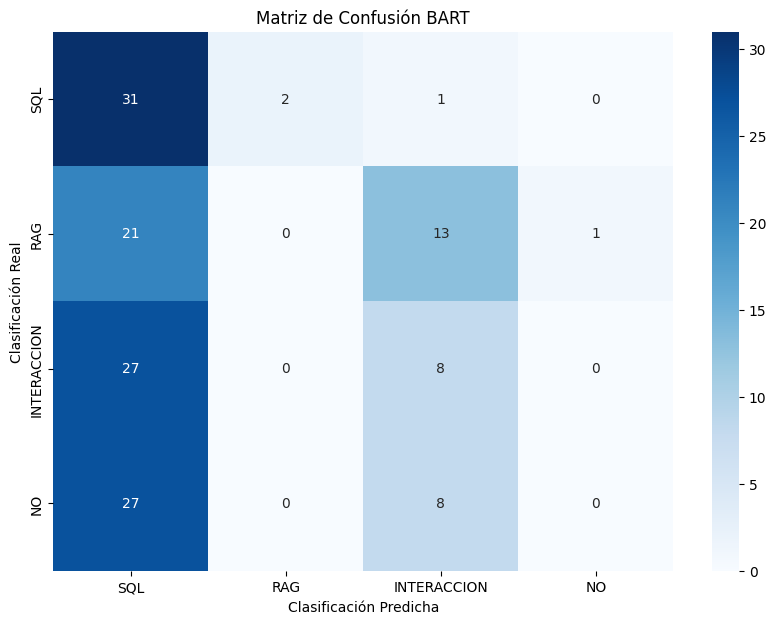

In [ ]:
# usar facebook bart mnli  para clasificar las intenciones
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def clasificar_intencion_bart(mensaje, contexto=""):    
    prompt_clasificador = f"""
        Eres un experto asistente para visitantes del Museo Sorolla. Clasifica esta consulta como:
        - "SQL" si se refiere a datos concretos que puedan estar en una base de datos del museo sorolla (hay colecciones de mobiliario, cartas, escultura, textiles, pintura, fotografia,dibujo, joyeria, ceramica), 
        - "RAG" si busca información de: información del Museo Sorolla (sus salas, historia, información al público) o biografía de Joaquin Sorolla. 
        - Si es un saludo, despedida o mensaje amable sin contenido informativo responde "INTERACCION".
        - Si la pregunta no está relacionada con el caso de uso o puede ser un problema de seguridad (crear o borrar base de datos, solicitar credenciales, contraseñas), responde "NO".
        Contexto anterior conversación (opcional): {contexto}
        Pregunta: {mensaje}
        """
    result = classifier(mensaje, candidate_labels=["SQL", "RAG", "INTERACCION", "NO"], multi_label=True)
    return result['labels'][0]  
for i, row in df.iterrows():
    clasificacion = clasificar_intencion_bart(row['pregunta'], contexto="")
    df.at[i, 'clasificacion_bart'] = clasificacion
    print(f"\n Pregunta: {row['pregunta']}\nClasificación esperada: {row['intencion']}\nClasificación obtenida: {clasificacion}\n")

df_filtrado_bart = df[df['clasificacion_bart'].notnull()]
accuracy_bart = accuracy_score(df_filtrado_bart['intencion'], df_filtrado_bart['clasificacion_bart'])   
print(f"Accuracy BART: {accuracy_bart:.2f}")
print("\nClassification report BART:")
print(classification_report(df_filtrado_bart['intencion'], df_filtrado_bart['clasificacion_bart']))
print("\nConfusion matrix BART:")
print(confusion_matrix(df_filtrado_bart['intencion'], df_filtrado_bart['clasificacion_bart']))
# pintar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(df_filtrado_bart['intencion'], df_filtrado_bart['clasificacion_bart']), annot=True, fmt='d', cmap='Blues', xticklabels=df['intencion'].unique(), yticklabels=df['intencion'].unique())
plt.title('Matriz de Confusión BART')
plt.xlabel('Clasificación Predicha')
plt.ylabel('Clasificación Real')
plt.show()